<p style="text-align: center; font-size: 35px">TIỂU LUẬN / ĐỒ ÁN</p> <br>
<p style="text-align: center; font-size: 35px">PHÂN TÍCH CÁC YẾU TỐ ẢNH HƯỞNG ĐẾN KẾT QUẢ HỌC TẬP</p> 

## Bảng mục lục 
- 1. [Mục Tiêu](#muc-tieu)
- 2. [Giới thiệu về tập dữ liệu](#introduction)
- 3. [Thực hiện các công việc](#assignments) <br>
  - 3.1. [Công việc 1: Khám phá và xử lý dữ liệu](#task-1) <br>
    - 3.1.1. [Tải và đọc dữ liệu bằng pandas](#task-1-1) <br>
    - 3.1.2. [Phân tích cơ bản: kiểm tra giá trị thiếu và xử lý (ví dụ: thay bằng trung bình hoặc loại bỏ).](#task-1-2) <br>
    - 3.1.3. [Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime, v.v](#task-1-3) <br>
  - 3.2. [Công việc 2: Trực quan hóa dữ liệu](#task-2) <br>
    - 3.2.1. [Biểu đồ từ thư viện Matplotlib](#task-2-1) <br>
    - 3.2.2. [Biểu đồ từ thư viện Seaborn](#task-2-2) <br>
    - 3.2.3. [Biểu đồ từ thư viện Bokeh](#task-2-3) <br>
  - 3.3. [Công việc 3: Kiểm định thống kê với giả thuyết](#task-3) <br>
    - 3.3.1. [Kiểm định t-test](#task-3-1) <br>  
    - 3.3.2. [Kiểm định z-test](#task-3-2) <br>
    - 3.3.3. [Kiểm định Chi-square-test](#task-3-3) <br>
  - 3.4. [Công việc 4: Phân tích và báo cáo](#task-4) <br>
    - 3.4.1. [Giới thiệu tập dữ liệu, lý do chọn file, mục tiêu phân tích.](#task-4-1) <br>
    - 3.4.2. [Mô tả cách tạo 3 biểu đồ, lý do chọn, xử lý dữ liệu (nếu có).](#task-4-2) <br>
    - 3.4.3. [Phân tích xu hướng từ biểu đồ và kết quả kiểm định.](#task-4-3) <br>
    - 3.4.4. [Đề xuất ít nhất 2 cách cải thiện kết quả học tập, dựa trên dữ liệu và kiểm định.](#task-4-4) <br>


## <span id="muc-tieu"></span>
# 1. Mục Tiêu

Sử dụng Python (Matplotlib, Seaborn, Bokeh, pandas, scipy.stats) để phân tích tập dữ liệu về kết quả học tập, nhằm:

- Khám phá các yếu tố ảnh hưởng đến điểm số, như thời gian học, ngày nghỉ, giới tính.
- Áp dụng kiểm định thống kê (t-test, z-test, chi-square) với các giả thuyết (được xác định trong Công việc 3) để phân tích các xu hướng.
- Đề xuất cách cải thiện hiệu suất học tập dựa trên dữ liệu.

## <span id="introduction"></span>
# 2. Giới thiệu về tập dữ liệu



- Nguồn: <a herf='https://archive.ics.uci.edu/dataset/320/student+performance'>UCI Machine Learning Repository.</a>
- File: student-mat.csv (môn Toán).
- Nội dung: ~395 bản ghi, với:
  - G1, G2, G3: Điểm kỳ 1, kỳ 2, kỳ cuối (0-20).
  - studytime: Thời gian học/tuần (1: <2 giờ, 2: 2-5 giờ, 3: 5-10 giờ, 4: >10 giờ).
  - absences: Số ngày nghỉ (0-93).
  - sex: Giới tính (M/F).
  - age, freetime: Tuổi, thời gian rảnh (1-5).


## <span id="assignments"></span>
# 3. Thực hiện các công việc

### Bắt đầu với Spark session

In [1]:
# Cấu hình pandas
import pandas as pd


import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Studying_Result').getOrCreate()

## <span id="task-1"></span>
### 3.1. Công việc 1: Khám phá và xử lý dữ liệu

## <span id="task-1-1"></span>
### 3.1.1. Tải và đọc dữ liệu bằng pandas

In [2]:
df = spark.read.csv("D:\\School\\Nam_3_Hoc_KY_2\\PTDL\\DoAnCuoiKy\\student+performance\\student\\student-mat.csv",header=True, inferSchema=True,sep=";")
df.limit(10).toPandas()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## <span id="task-1-2"></span>
### 3.1.2. Phân tích cơ bản: kiểm tra giá trị thiếu và xử lý (ví dụ: thay bằng trung bình hoặc loại bỏ).

#### Kiểm tra giá trị bị thiếu

In [3]:
df_pandas = df.toPandas()
count = df_pandas.isnull().sum().sum()
print(f"Tổng số dữ liệu thiếu: {count}")

Tổng số dữ liệu thiếu: 0


## <span id="task-1-3"></span>
### 3.1.3. Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime, v.v

##### Thông tin tổng quan:

In [4]:
print("Số lượng bản ghi trong tập dữ liệu:", df.count())

Số lượng bản ghi trong tập dữ liệu: 395


In [6]:
df_pandas = df.toPandas()
df.describe()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int32 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int32 
 7   Fedu        395 non-null    int32 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int32 
 13  studytime   395 non-null    int32 
 14  failures    395 non-null    int32 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### Phân phối điểm G3 (Điểm cuối kỳ)

1. Thông tin cơ bản
  - Tổng số học sinh: 395
  - Giá trị điểm G3 duy nhất

In [9]:
df_pandas = df.toPandas()
sorted(df_pandas['G3'].unique())

[np.int32(0),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(12),
 np.int32(13),
 np.int32(14),
 np.int32(15),
 np.int32(16),
 np.int32(17),
 np.int32(18),
 np.int32(19),
 np.int32(20)]

2. Trực quan sự phân phối G3

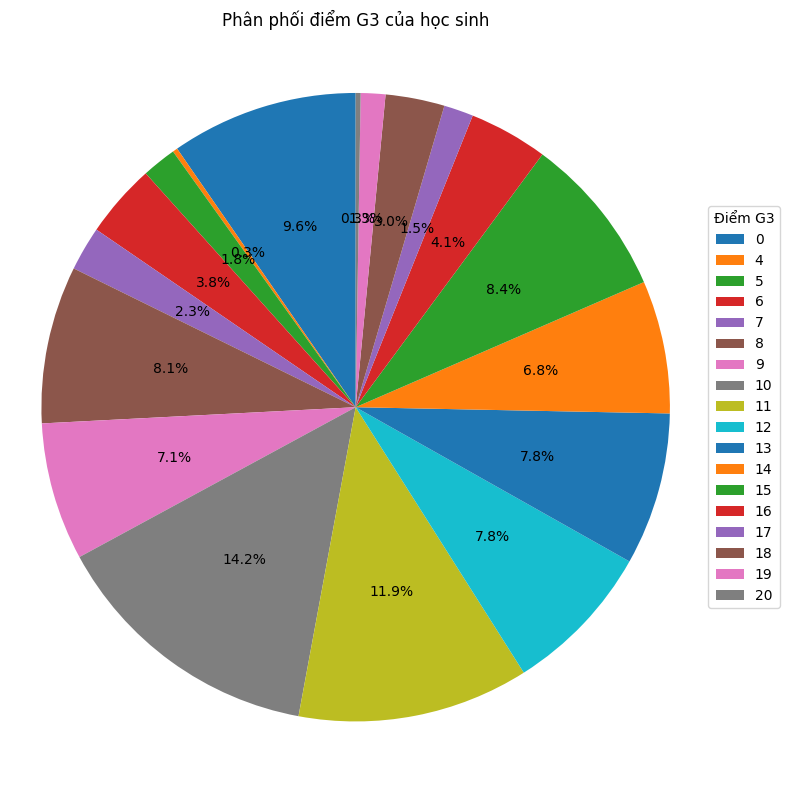

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
df_pandas = df.toPandas()
g3_counts = df_pandas['G3'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    g3_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90
)

plt.legend(wedges, g3_counts.index, title="Điểm G3", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Phân phối điểm G3 của học sinh')
plt.axis('equal')  
plt.tight_layout()
plt.show()

Phân phối điểm G3 (số lượng theo từng điểm)

In [ ]:
df_pandas = df.toPandas()
df_pandas['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

3. Thống kê mô tả

In [ ]:
df_pandas = df.toPandas()
df_pandas['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

4. Kết luận mô tả

- Giá trị thấp nhất: 0

- Giá trị cao nhất: 20

- Trung bình (mean): khoảng 10.4

- Trung vị (median): 11

- Độ lệch chuẩn: khoảng 4.6

- Số học sinh đạt điểm 0: Có ~37 học sinh (~9.4%) bị điểm liệt hoặc rớt môn.

- Xu hướng phân phối:
  - Số lượng học sinh có điểm G3 từ 10 đến 15 là nhiều nhất.

##### Phân phối thời gian học

In [19]:
studytime_distribution = df_pandas['studytime'].value_counts().sort_index()
print("Phân phối thời gian học (studytime):")
for studytime, count in studytime_distribution.items():
    print(f"  Studytime = {studytime}: {count} học sinh")

Phân phối thời gian học (studytime):
  Studytime = 1: 105 học sinh
  Studytime = 2: 198 học sinh
  Studytime = 3: 65 học sinh
  Studytime = 4: 27 học sinh


## <span id="task-2"></span>
### 3.2. Công việc 2: Trực quan hóa dữ liệu

## <span id="task-2-1"></span>
#### 3.2.1. Biểu đồ từ thư viện Matplotlib

- Cấu hình thư viện matplot

In [21]:
# Cấu hình matplotlib
import matplotlib.pyplot as plt

- Biểu đồ cột: Số lượng học sinh theo thời gian học (studytime)

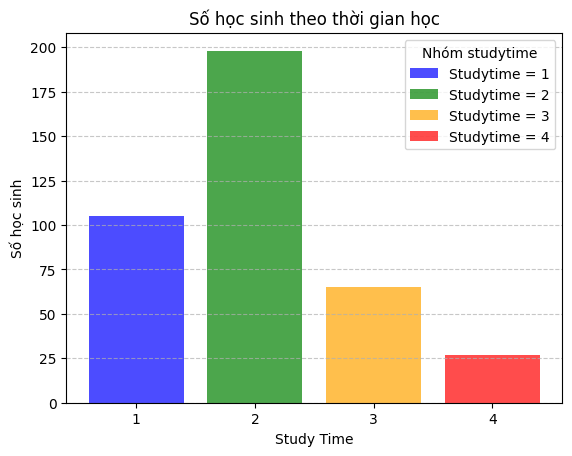

In [7]:
df_pandas = df.toPandas()
studytime_counts = df_pandas.groupby('studytime').size()

studytime_index = studytime_counts.index
studytime_values = studytime_counts.values

colors = ['blue', 'green', 'orange', 'red']  


bars = plt.bar(studytime_index, studytime_values, color=colors, alpha=0.7)


plt.xlabel('Study Time')
plt.ylabel('Số học sinh')
plt.title('Số học sinh theo thời gian học')


plt.xticks(studytime_index)


plt.grid(axis='y', linestyle='--', alpha=0.7)


legend_labels = [f'Studytime = {time}' for time in studytime_index]
plt.legend(bars, legend_labels, title="Nhóm studytime")


plt.show()




## <span id="task-2-2"></span>
#### 3.2.2. Biểu đồ từ thư viện Seaborn

- Cấu hình thư viện Seaborn

In [ ]:
#Cấu hình seaborn
import seaborn as sns

- Biểu đồ boxplot: Phân phối G3 theo studytime.

C:\Users\Admin\AppData\Local\Temp\ipykernel_34828\3090367633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')


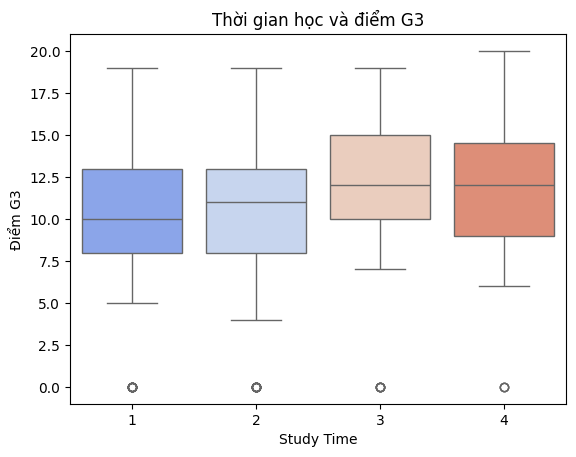

In [ ]:
sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')
plt.title('Thời gian học và điểm G3')
plt.xlabel('Study Time')
plt.ylabel('Điểm G3')
plt.show()

- Biểu đồ pairplot: Mối quan hệ giữa G1, G2, G3, studytime.

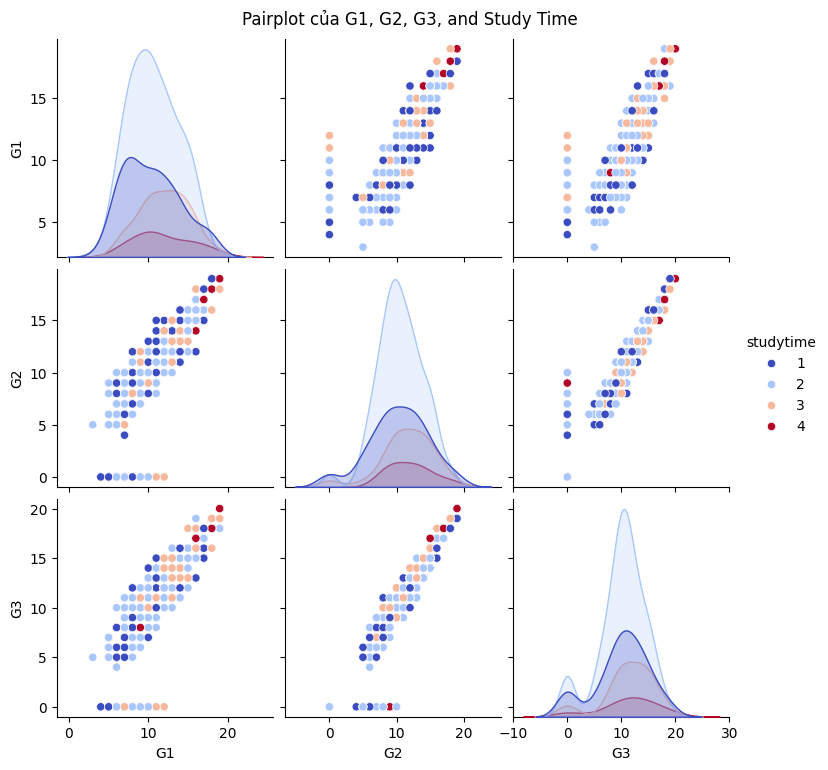

In [ ]:
sns.pairplot(df_pandas[['G1', 'G2', 'G3', 'studytime']], hue='studytime', palette='coolwarm')

plt.suptitle('Pairplot của G1, G2, G3, and Study Time', y=1.02)


plt.show()

## <span id="task-2-3"></span>
#### 3.2.3. Biểu đồ từ thư viện Bokeh

- Cấu hình thư viện Bokeh

In [69]:
# Cấu hình Bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CustomJS, Slider
from bokeh.palettes import Bright3
from bokeh.layouts import column, row


- Biểu đồ phân tán tương tác: studytime và G3, với HoverTool hiển thị age, sex, absences.

In [ ]:
output_notebook()

df_pandas = df.toPandas()
sources = ColumnDataSource(df_pandas)
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=500, height=600)
fig.circle(x='studytime', y='G3', source=sources, size=10, color='navy', alpha=0.5)
fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
show(fig)

Loading BokehJS ...

- Row layout: (1) Biểu đồ cột cho studytime, (2) Biểu đồ phân tán như trên.

In [67]:
# Chuẩn bị dữ liệu
counteachstudytime = df_pandas.groupby('studytime')['G3'].sum().reset_index()

studytime_title = counteachstudytime['studytime'].astype(str).tolist()
studytime_count = counteachstudytime['G3'].tolist()

source = ColumnDataSource(data=dict(
    studytime_title=studytime_title,
    studytime_count=studytime_count,
    color=Bright3
))

# Vẽ biểu đồ
p = figure(x_range=studytime_title,width=500, height=600, title="Tổng điểm G3 theo thời gian học", toolbar_location=None, tools="")

p.vbar(x='studytime_title', top='studytime_count', width=0.9, source=source, legend_field="studytime_title", line_color='white', fill_color='color')

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Nếu fig là biểu đồ scatter bạn đã tạo trước đó
row_layout = row(fig, p)

# Nếu chưa có fig thì chỉ show p
show(row_layout)

- Tính năng ẩn/hiện cho nam và nữ trong biểu đồ phân tán.

In [65]:
output_notebook()

df_pandas = df.toPandas()

colors = {"M": 'red', "F": 'blue'}
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=800, height=400)
for sex_value, color in colors.items():
    subset = df_pandas[df_pandas["sex"] == sex_value]
    source = ColumnDataSource(subset)
    fig.circle(x='studytime', y='G3', source=source, size=10, color=color,
                alpha=0.3,  legend_label=f"Giới tính: {sex_value}")

fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.click_policy = "hide"
fig.legend.title = "Giới tính"
show(fig)

Loading BokehJS ...

- Thêm slider widget trong Bokeh để lọc studytime và cập nhật biểu đồ.

In [77]:
output_notebook()

df_pandas = df.toPandas()

sources = []
original_sources = []
colors = {"M": 'red', "F": 'blue'}

fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=800, height=400)
for sex_value, color in colors.items():
    subset = df_pandas[df_pandas["sex"] == sex_value]
    original_source = ColumnDataSource(subset)
    source = ColumnDataSource(subset)

    original_sources.append(original_source)
    sources.append(source)

    fig.circle(x='studytime', y='G3', source=source, size=10, color=color,
                alpha=0.3,  legend_label=f"Giới tính: {sex_value}")
    

callback = CustomJS(args=dict(sources=sources, original_sources=original_sources), code="""
    var threshold = cb_obj.value;

    
    for (var i = 0; i < sources.length; i++) {
        var source = sources[i];
        var original_data = original_sources[i].data;
        var new_data = {studytime: [], G3: [], age: [], sex: [], absences: []};

        for (var j = 0; j < original_data['studytime'].length; j++) {
            if (original_data['studytime'][j] >= threshold) {
                new_data['studytime'].push(original_data['studytime'][j]);  
                new_data['G3'].push(original_data['G3'][j]); 
                new_data['age'].push(original_data['age'][j]);
                new_data['sex'].push(original_data['sex'][j]);
                new_data['absences'].push(original_data['absences'][j]);
            }
        }

        // Cập nhật dữ liệu
        source.data = new_data;
        source.change.emit();
    }
""")


slider = Slider(start=0, end=4, value=0, step=0.01, title="Ngưỡng Study Time")
slider.js_on_change("value", callback) 


fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.click_policy = "hide"
fig.legend.title = "Giới tính"
show(column(fig, slider))

Loading BokehJS ...

## <span id="task-3"></span>
### 3.3. Công việc 3: Kiểm định thống kê với giả thuyết

- Cấu hình kiểm định thống kê với giải thuyết

In [19]:
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import numpy as np

## <span id="task-3-1"></span>
#### 3.3.1. Kiểm định t-test

Ta có:
- Giả thuyết H: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).



- Giả thuyết H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).

- Giả định trung bình điểm G3 của học sinh có ngày nghỉ thấp:

In [38]:
df_pandas = df.toPandas()
mean_absences = df_pandas['absences'].mean()
low_absence = df_pandas[df_pandas['absences'] <= mean_absences]['G3']
print(f"Giá trị trung bình điểm G3 của học sinh có ngày nghỉ thấp: {low_absence.mean():.2f}")

Giá trị trung bình điểm G3 của học sinh có ngày nghỉ thấp: 10.17


- Giả định trung bình điểm G3 của học sinh có ngày nghỉ cao 

In [39]:
df_pandas = df.toPandas()
mean_absences = df_pandas['absences'].mean()
high_absence = df_pandas[df_pandas['absences'] > mean_absences]['G3']
print(f"Giá trị trung bình điểm G3 của học sinh có ngày nghỉ cao: {high_absence.mean():.2f}")

Giá trị trung bình điểm G3 của học sinh có ngày nghỉ cao: 10.84


=> Bằng mắt thường, ta đã thấy giá trị trung bình điểm G3 của nhóm học sinh nghỉ nhiều thấp hơn không đáng kể so với giá trị điểm trung bình G3 của nhóm học sinh nghỉ ít. 

Kiểm định giả thuyết H và H0

- Độ lệch chuẩn của trung bình điểm G3 học sinh có ngày nghỉ thấp đã có:

In [46]:
dolechchuanthap = low_absence.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuanthap:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 5.19


- Độ lệch chuẩn của trung bình điểm G3 học sinh có ngày nghỉ cao đã có:

In [45]:
dolechchuancao = high_absence.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuancao:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 3.26


- Tính giá trị Z

In [50]:
z = (low_absence.mean() - high_absence.mean()) / np.sqrt((dolechchuanthap**2 / len(low_absence)) + (dolechchuancao**2 / len(high_absence)))
print(f"Giá trị Z: {z:.4f}")

Giá trị Z: -1.5676


- Tính p-value

In [51]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Giá trị P: {p_value:.4f}")

Giá trị P: 0.1170


In [58]:
# Kết luận rằng
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
    print("Chấp nhận H: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
else:
    print("Chấp nhận H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
    print("Bác bỏ H: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")

Chấp nhận H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).
Bác bỏ H: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).


- Ý nghĩa thực tế: Việc chấp nhận H0 và bác bỏ H cho thấy rằng việc học sinh nghỉ nhiều không có ảnh hưởng đến điểm trung bình G3 của họ, tương tự đối với học sinh học nhiều hơn thì điểm trung bình G3 của họ chỉ cao hơn một chút. 

## <span id="task-3-2"></span>
#### 3.3.2. Kiểm định z-test

Ta có:
- Giả thuyết H: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).


- Giả thuyết H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không có sự khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).

- Trung bình giả định đã có:

In [33]:
df_pandas = df.toPandas()
population_mean = df_pandas['G3']
print(f"Giá trị trung bình giả định của toàn bộ: {population_mean.mean():.2f}")

Giá trị trung bình giả định của toàn bộ: 10.42


- Trung bình thực tế đã có:

In [28]:
df_pandas = df.toPandas()
low_studytime = df_pandas[df_pandas['studytime'] <= 2]['G3']
print(f"Giá trị trung bình thực tế của nhóm G3 học ít: {low_studytime.mean():.2f}")

Giá trị trung bình thực tế của nhóm G3 học ít: 10.13


=> Bằng mắt thường, ta đã thấy giá trị trung bình G3 của nhóm học ít (studytime <= 2) không khác đáng kể so với giá trị trung bình G3 của toàn bộ. 

Kiểm định giả thuyết H và H0

- Độ lệch chuẩn đã có:

In [41]:
dolechchuan = low_studytime.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuan:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 4.48


- Tính giá trị Z

In [35]:
z = (low_studytime.mean() - population_mean.mean()) / (dolechchuan / np.sqrt(len(low_studytime)))
print(f"Giá trị Z: {z:.4f}")

Giá trị Z: -1.1132


- Tính p-value

In [36]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Giá trị P: {p_value:.4f}")

Giá trị P: 0.2656


In [52]:
# Kết luận rằng
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")
    print("Chấp nhận H: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")
else:
    print("Chấp nhận H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu). ")
    print("Bác bỏ H: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")

Chấp nhận H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu). 
Bác bỏ H: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).


- Ý nghĩa thực tiễn:


  Việc chấp nhận H0 và bác bỏ H thể hiện rằng việc học sinh học ít không có ảnh hưởng quá nhiều đến điểm số G3

## <span id="task-3-3"></span>
#### 3.3.3. Kiểm định Chi-square-test

In [92]:
# Tạo biến nhị phân: G3 cao >=12, thấp <12
df_pandas['G3_level'] = np.where(df_pandas['G3'] >= 12, 'High', 'Low')

# Bảng tần số (contingency table)
contingency_table = pd.crosstab(df_pandas['studytime'], df_pandas['G3_level'])

print("Bảng tần số:")
print(contingency_table)

# Thực hiện chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2-statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Kết luận
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H0: Có mối quan hệ giữa studytime và việc đạt điểm cao/thấp.")
else:
    print("Không đủ bằng chứng bác bỏ H0: Chưa kết luận có mối quan hệ.")

Bảng tần số:
G3_level   High  Low
studytime           
1            44   61
2            71  127
3            33   32
4            14   13
Chi2-statistic: 6.0775
P-value: 0.1079
Không đủ bằng chứng bác bỏ H0: Chưa kết luận có mối quan hệ.


## <span id="task-4"></span>
### 3.4. Công việc 4: Phân tích và báo cáo

## <span id="task-4-1"></span>
#### 3.4.1. Giới thiệu tập dữ liệu, lý do chọn file, mục tiêu phân tích.

- Giới thiệu chi tiết về tập dữ liệu <br>
Dữ liệu này là thành tích học tập của học sinh trong giáo dục trung học. Các thuộc tính dữ liệu bao gồm điểm số của học sinh, đặc điểm nhân khẩu học, xã hội và liên quan đến trường học và được thu thập bằng cách sử dụng báo cáo của trường và bảng câu hỏi. Hai tập dữ liệu được cung cấp liên quan đến thành tích trong hai môn học riêng biệt: Toán (mat) và tiếng Bồ Đào Nha (por).
  - Nguồn gốc: bản ghi thuộc quyền sở hữu của các tác giả là P. Cortez, A. M. G. Silva và được đăng tải trên UC Irvine Machine Learning Repository.
  - Số lượng bản ghi: 395 bản ghi.

- Lý do chọn file về môn Toán học <br>
Vì bản thân em muốn tìm hiểu xem các học sinh ở nước ngoài có yêu thích và đầu tư thời gian vào việc học toán hơn so với các môn ngoại ngữ. Thông qua phân tích các yếu tố như số ngày nghỉ, thời gian học, điểm số cuối kỳ (G3) và các yếu tố liên quan, em hy vọng có thể đánh giá được mức độ quan tâm và khả năng học tập môn Toán của học sinh.

- Mục tiêu phân tích
Mục tiêu của việc phân tích tập dữ liệu là tìm hiểu các yếu tố ảnh hưởng đến kết quả học tập môn Toán của học sinh, đặc biệt là điểm số cuối kỳ (G3). Cụ thể, em muốn phân tích mối quan hệ giữa thời gian học, số ngày nghỉ, các hoạt động ngoài giờ và kết quả học tập, xem chúng có ảnh hưởng hay liên kết sâu sắc với nhau như thế nào.

## <span id="task-4-2"></span>
#### 3.4.2. Mô tả cách tạo 3 biểu đồ, lý do chọn, xử lý dữ liệu.

#### - Biểu đồ 1: Biểu đồ cột từ thư viện Matlib - Số lượng học sinh theo thời gian học (studytime)

Để thể hiện số lượng học sinh theo các thời gian học, việc sử dụng biểu đồ cột từ Matplotlib là một cách tốt nhất để thấy rõ sự gom nhóm từ thuộc tính thời gian học (studytime).

  - Thư viện: matplotlib.pyplot
  - Hàm: plt.bar()
  - Tham số chính:
    - Trục ngang x: các mức thời gian học (1, 2, 3, 4)
    - Trục dọc y: số lượng học sinh
  - Lý do chọn biểu đồ: Biểu đồ cột trực quan cho thấy phân bố số lượng học sinh theo thời gian học, giúp dễ dàng nhận biết mức độ phổ biến của từng khoảng thời gian học trong tập dữ liệu.
  - Xử lý dữ liệu: Thực hiện phép gom nhóm theo thời gian học (studytime), tự động sẽ được lấy dữ liệu được phân theo nhóm để hiển thị số lượng học sinh của từng nhóm.

#### - Biểu đồ 2: Biểu đồ Boxplot từ thư viện Seaborn - Phân phối G3 theo thời gian học (studytime)

Để so sánh điểm G3 giữa các nhóm thời gian học với nhau, việc sử dụng biểu đồ hộp (Boxplot) từ thư viện Seaborn là hợp lý:
- Thư viện: Seaborn
- Hàm: sns.boxplot()
- Tham số chính:
  - Cột ngang x = 'studytime' : Nhóm phân loại thời gian học (studytime)
  - Cột dọc y = 'G3' : biến cần so sánh
  - data = df_pandas: nguồn dữ liệu
- Lý do chọn biểu đồ: Boxplot giúp thể hiện rõ sự phân bố, trung vị và các điểm ngoại lệ trong mức độ hài lòng giữa các nhóm. Biểu đồ này phù hợp để thấy rõ sự khác biệt tổng thể, điều mà biểu đồ cột không thể hiện được.
- Xử lý dữ liệu: Chỉ cần lọc các giá trị hợp lệ của studytime và G3 (nếu có thiếu dữ liệu thì loại bỏ).

#### - Biểu đồ 3: Biểu đồ phân tán tương tác từ thư viện Bokeh - Tương tác giữa studytime và G3, với HoverTool hiển thị age, sex, absences.

Để dễ dàng thấy được mối quan hệ giữa thuộc tính studytime và G3 tương tác với nhau, sử dụng biểu đồ phân tán từ Bokeh là sự lựa chọn tối ưu, người dùng có thể tương tác với dữ liệu như cho phép linh hoạt ẩn, hiện các dữ liệu theo nhóm, lọc dữ liệu theo ngưỡng satisfaction_level hoặc last_evaluation.

- Loại thư viện: bokeh.plotting
- Các hàm chính để tạo biểu đồ: figure(), circle(), HoverTool()
- Tham số chỉnh:
  - Cột ngang x = 'studytime', cột dọc y = 'G3', và color = 'sex' để phân biệt các cá thể dựa vào giới tính nam và nữ.
  - Ngoài ra, trong biểu đồ còn sử dụng biến legend.click_policy = "hide" để tăng tương tác.
- Lý do chọn biểu đồ: Scatter Plot từ thư viện Bokeh cần thiết trong việc tương tác với biểu đồ, xem thông tin chi tiết của từng điểm bằng hàm HoverTool(), hiển thị từng điểm cụ thể mà không làm mất đi tính chi tiết của dữ liệu.
- Xử lý dữ liệu:
  - Chọn các cột cần thiết từ bộ dữ liệu: studytime, G3, age, sex, absences.
  - Xử lý giá trị thiếu (nếu có) bằng cách loại bỏ (dropna) để tránh lỗi khi vẽ biểu đồ.
  - Có thể chuyển đổi sex thành dạng văn bản ('Male'/'Female') nếu cần hiển thị đẹp hơn trên hover.

## <span id="task-4-3"></span>
#### 3.4.3. Phân tích xu hướng từ biểu đồ và kết quả kiểm định.

Phân tích từ ba biểu đồ cho thấy các xu hướng ảnh hưởng lớn đến G3

<p style="text-align: center; font-size:35px">Biểu đồ cột từ thư viện Matplot</p> <br>

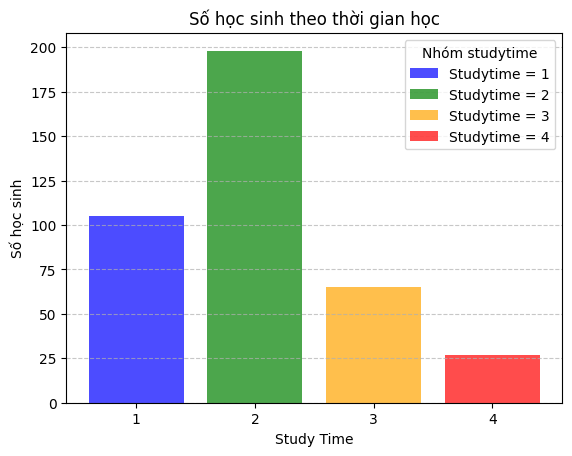

In [8]:
import matplotlib.pyplot as plt
df_pandas = df.toPandas()
studytime_counts = df_pandas.groupby('studytime').size()

studytime_index = studytime_counts.index
studytime_values = studytime_counts.values

colors = ['blue', 'green', 'orange', 'red']  


bars = plt.bar(studytime_index, studytime_values, color=colors, alpha=0.7)


plt.xlabel('Study Time')
plt.ylabel('Số học sinh')
plt.title('Số học sinh theo thời gian học')


plt.xticks(studytime_index)


plt.grid(axis='y', linestyle='--', alpha=0.7)


legend_labels = [f'Studytime = {time}' for time in studytime_index]
plt.legend(bars, legend_labels, title="Nhóm studytime")


plt.show()




- Studytime = 2 có số lượng học sinh đông nhất, vượt trội so với các nhóm còn lại.
-> Điều này cho thấy đa số học sinh chỉ dành thời gian vừa phải cho việc học toán trên lớp, ngoài ra họ dành thời gian để tự học hoặc tham gia các hoạt động khác.
- Studytime = 3 cũng có số lượng học sinh khá cao, tuy nhiên ít hơn nhóm 2.
- Studytime = 1 và Studytime = 4 đều có số lượng học sinh thấp hơn nhiều.
Theo biểu đồ, ta thấy có rất ít học sinh dành thời gian cho việc học toán tại lớp.

<p style="text-align: center; font-size:35px">Biểu đồ hộp từ thư viện Seaborn</p> <br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_23460\4030416941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')


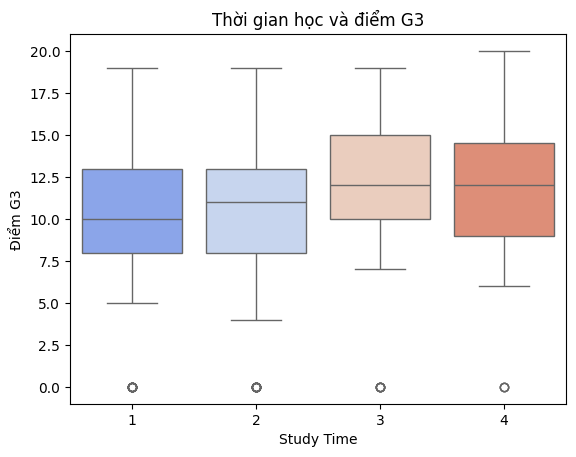

In [9]:
import seaborn as sns
df_pandas = df.toPandas()
sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')
plt.title('Thời gian học và điểm G3')
plt.xlabel('Study Time')
plt.ylabel('Điểm G3')
plt.show()

- Studytime = 1 :

  - Điểm G3 có xu hướng thấp hơn các nhóm khác.

  - Trung vị (median) của điểm G3 ở mức khoảng 10.

  - Có nhiều giá trị thấp, thậm chí có học sinh đạt điểm 0.

- Studytime = 2 :

  - Phân phối điểm G3 tương tự Studytime 1, trung vị nhỉnh hơn chút.

  - Xuất hiện thêm nhiều học sinh có điểm khá.

- Studytime = 3 :

  - Trung vị G3 cao hơn hẳn hai nhóm đầu.

  - Phân phối điểm dàn đều hơn, ít học sinh đạt điểm thấp.

- Studytime = 4 :

  - Trung vị tương đương Studytime 3, thậm chí nhỉnh hơn một chút.

  - Các học sinh học nhiều thời gian thường đạt kết quả tốt hơn, ít học sinh đạt điểm thấp.

<p style="text-align: center; font-size:35px">Biểu đồ tương tác từ thư viện Bokeh </p> <br>


In [11]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CustomJS, Slider
from bokeh.palettes import Bright3
from bokeh.layouts import column, row
output_notebook()

df_pandas = df.toPandas()
sources = ColumnDataSource(df_pandas)
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=500, height=600)
fig.circle(x='studytime', y='G3', source=sources, size=10, color='navy', alpha=0.5)
fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
show(fig)

Loading BokehJS ...

- Học sinh ở mọi mức độ studytime đều có những điểm số rất thấp (thậm chí bằng 0). Điều này cho thấy chỉ tăng thời gian học không hoàn toàn đảm bảo tránh rủi ro thất bại.
- Xu hướng chung: Khi thời gian học (studytime) tăng lên từ 1 ➔ 4:
  - Ở mức studytime = 1 và 2, ta thấy có học sinh đạt điểm cao dù đầu tư rất ít thời gian học tập. Đa số điểm sẽ rơi trung bình vào từ 10 đến 15 điểm. Điều này cho thấy việc đầu tư ít thời gian nhưng vẫn không ảnh hưởng đáng kể đến điểm G3.
  - Mức studytime = 3 và 4, ta thấy trung bình điểm thi G3 đã phân bổ ở mức cao hơn nhiều so với nhóm đầu tư ít vào việc học. Riêng studytime = 4, có một vài học sinh đã đạt điểm tối đa bởi đầu tư sâu vào việc học.
-  Tuy nhiên, vẫn tồn tại sự phân tán lớn ở tất cả các nhóm: có học sinh điểm thấp ngay cả khi học nhiều.

- Từ kết quả kiểm định giả thuyết (z-test, t-test):

  - Không có sự khác biệt đáng kể về điểm G3 đối với nhóm học ít so với toàn bộ mẫu.

  - Tuy nhiên, có xu hướng cho thấy học sinh có số ngày nghỉ nhiều (absences cao) thì điểm G3 thấp hơn, dù kiểm định chưa đạt ý nghĩa thống kê (p > 0.05).

 Kết luận yếu tố ảnh hưởng lớn đến G3:

Studytime (thời gian học) có ảnh hưởng tích cực rõ rệt đến điểm G3.

G1 và G2 (điểm các kỳ kiểm tra trước) có mối tương quan mạnh với G3.

Absences (ngày nghỉ học) có xu hướng ảnh hưởng tiêu cực đến G3.

## <span id="task-4-4"></span>
#### 3.4.4. Đề xuất ít nhất 2 cách cải thiện kết quả học tập, dựa trên dữ liệu và kiểm định.

Dựa trên dữ liệu và kiểm định, đề xuất:

Tăng thời gian tự học:
Khuyến khích học sinh dành nhiều thời gian hơn cho việc học ngoài giờ lên lớp. Các em có thể được hướng dẫn lập kế hoạch học tập cá nhân với số giờ tối thiểu mỗi tuần (ví dụ: từ 5 giờ trở lên).

Giảm thiểu số ngày nghỉ học:
Cần theo dõi sát sao tình trạng nghỉ học của học sinh. Các chương trình hỗ trợ như tư vấn sức khỏe, tạo động lực học tập có thể giúp học sinh duy trì sự chuyên cần, từ đó cải thiện kết quả học tập.